In [2]:
from sqlalchemy import create_engine
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

In [3]:
z = pd.read_csv('zrentals.csv')

In [4]:
z.head(5)

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,61639,10025,1,"New York, NY",2904.0,2832.0,2914.0,2937.0,2928.0,2936.0,...,2822.0,2787.0,2758.0,2794.0,2767.0,2832.0,2892.0,2975.0,3039.0,3124.0
1,84654,60657,2,"Chicago, IL",1381.0,1412.0,1412.0,1421.0,1438.0,1472.0,...,1548.0,1549.0,1563.0,1579.0,1594.0,1597.0,1600.0,1617.0,1624.0,1628.0
2,61637,10023,3,"New York, NY",2921.0,2941.0,2977.0,2968.0,2987.0,3045.0,...,2797.0,2715.0,2677.0,2705.0,2749.0,2779.0,2853.0,2902.0,2991.0,3085.0
3,91982,77494,4,"Houston, TX",1340.0,1399.0,1406.0,1413.0,1388.0,1377.0,...,1366.0,1385.0,1384.0,1379.0,1380.0,1384.0,1408.0,1438.0,1501.0,1538.0
4,84616,60614,5,"Chicago, IL",1724.0,1750.0,1762.0,1776.0,1797.0,1815.0,...,1944.0,1870.0,1847.0,1891.0,1953.0,1997.0,2048.0,2074.0,2096.0,2100.0


In [5]:
zny = z[z.MsaName == 'New York, NY']

In [6]:
zny.shape   #We have 146 rows of data for mean price of rentals for zip codes in New York City. 

(146, 95)

In [7]:
zny.describe()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
count,146.000000,146.000000,146.000000,131.000000,120.000000,102.000000,136.000000,137.000000,138.000000,140.000000,...,142.000000,142.000000,140.000000,137.000000,135.000000,133.000000,135.000000,139.000000,139.000000,141.000000
mean,66205.513699,9884.383562,2159.589041,2797.671756,2231.883333,2290.529412,2388.110294,2483.547445,2674.623188,2601.707143,...,2774.901408,2857.394366,2593.107143,2748.948905,2806.466667,2908.992481,2730.488889,2784.402878,2570.812950,2804.943262
std,39423.815605,1577.452841,2159.844690,4500.788925,831.693526,739.644559,2091.951857,3089.820780,3792.103740,2752.944173,...,2843.086262,3197.627281,2369.828776,2962.212367,3198.249285,3916.015708,3174.434710,3343.801917,735.860303,2428.979341
min,60518.000000,7002.000000,1.000000,821.000000,841.000000,832.000000,804.000000,808.000000,795.000000,793.000000,...,1486.000000,1546.000000,1422.000000,1503.000000,1553.000000,1533.000000,1454.000000,1504.000000,1492.000000,1467.000000
25%,61182.250000,8809.250000,262.250000,1680.500000,1645.500000,1729.250000,1683.000000,1679.000000,1706.000000,1725.500000,...,2028.500000,2016.500000,1980.250000,1988.000000,2000.500000,2023.000000,2042.000000,2063.500000,2109.000000,2120.000000
50%,61649.500000,10035.500000,1498.500000,1975.000000,2047.500000,2074.000000,2031.500000,2035.000000,2025.500000,2078.500000,...,2287.000000,2293.500000,2223.500000,2229.000000,2293.000000,2321.000000,2318.000000,2356.000000,2354.000000,2366.000000
75%,62031.250000,11215.750000,3645.000000,2736.500000,2683.000000,2866.750000,2637.500000,2591.000000,2643.500000,2689.750000,...,2774.500000,2719.500000,2711.250000,2705.000000,2717.500000,2748.000000,2804.500000,2845.500000,2944.500000,3011.000000
max,399546.000000,12601.000000,8506.000000,46679.000000,6673.000000,5077.000000,24846.000000,37200.000000,41077.000000,24731.000000,...,29736.000000,30934.000000,29537.000000,31096.000000,32969.000000,35876.000000,38549.000000,41105.000000,6913.000000,29965.000000


In [8]:
zny.columns

Index(['RegionID', 'RegionName', 'SizeRank', 'MsaName', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08',
       '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02',
       '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
       '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
       '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
       '2020-03', '2020-04', '2020-05', '2020-

In [9]:
zny.shape

(146, 95)

In [10]:
zny.drop(zny.columns[4:87], axis=1,inplace=True) #Dropping lots of columns to simplify

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
zny.shape

(146, 12)

In [12]:
zny.head(3)

,RegionID,RegionName,SizeRank,MsaName,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,61639,10025,1,"New York, NY",2758.0,2794.0,2767.0,2832.0,2892.0,2975.0,3039.0,3124.0
2,61637,10023,3,"New York, NY",2677.0,2705.0,2749.0,2779.0,2853.0,2902.0,2991.0,3085.0
6,61616,10002,7,"New York, NY",2715.0,2710.0,2730.0,2770.0,2879.0,3003.0,3094.0,3250.0


In [13]:
zny.RegionName.nunique()

146

In [14]:
zny['Increase'] = zny['2021-07'] - zny['2020-12']

<ipython-input-14-2ff4aaa6077b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zny['Increase'] = zny['2021-07'] - zny['2020-12']


In [15]:
zny 

,RegionID,RegionName,SizeRank,MsaName,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,Increase
0,61639,10025,1,"New York, NY",2758.0,2794.0,2767.0,2832.0,2892.0,2975.0,3039.0,3124.0,366.0
2,61637,10023,3,"New York, NY",2677.0,2705.0,2749.0,2779.0,2853.0,2902.0,2991.0,3085.0,408.0
6,61616,10002,7,"New York, NY",2715.0,2710.0,2730.0,2770.0,2879.0,3003.0,3094.0,3250.0,535.0
10,62037,11226,11,"New York, NY",1989.0,1978.0,1989.0,2009.0,2030.0,2052.0,2070.0,2120.0,131.0
12,61630,10016,16,"New York, NY",2869.0,2885.0,2898.0,2958.0,3047.0,3152.0,3292.0,3425.0,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,60799,7760,7393,"New York, NY",3030.0,NaN,3506.0,NaN,NaN,NaN,NaN,NaN,NaN
2218,61664,10069,7587,"New York, NY",3972.0,3918.0,3958.0,3976.0,4073.0,4129.0,4332.0,4549.0,577.0
2224,61621,10007,7859,"New York, NY",5744.0,5667.0,5742.0,5976.0,6177.0,6547.0,6913.0,7210.0,1466.0
2228,61773,10282,8445,"New York, NY",4774.0,4856.0,4831.0,4985.0,5072.0,5113.0,5314.0,5468.0,694.0


In [16]:
zny.sort_values(by= 'Increase', ascending = False, inplace=True)

<ipython-input-16-3d14b32802a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zny.sort_values(by= 'Increase', ascending = False, inplace=True)


In [17]:
#This tell us that the zone with the bigger increase in price rents during since decemeber 2020 until july 2021 
#was the RegionName = 10007 or Zip code for Tribeca. 

Let's also see which are the higher prices of rent for the last measured period

In [18]:
zny.sort_values(by= '2021-07', ascending = False).head(5)

,RegionID,RegionName,SizeRank,MsaName,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,Increase
1574,62287,11937,3110,"New York, NY",NaN,NaN,NaN,32157.0,NaN,NaN,NaN,29965.0,NaN
2224,61621,10007,7859,"New York, NY",5744.0,5667.0,5742.0,5976.0,6177.0,6547.0,6913.0,7210.0,1466.0
2228,61773,10282,8445,"New York, NY",4774.0,4856.0,4831.0,4985.0,5072.0,5113.0,5314.0,5468.0,694.0
1192,61876,10583,2139,"New York, NY",NaN,3963.0,4296.0,4434.0,4506.0,4582.0,4704.0,4603.0,NaN
2218,61664,10069,7587,"New York, NY",3972.0,3918.0,3958.0,3976.0,4073.0,4129.0,4332.0,4549.0,577.0


In [19]:
# We see that the only area with a higher rent price is the zip code 11937 (East Hampton).

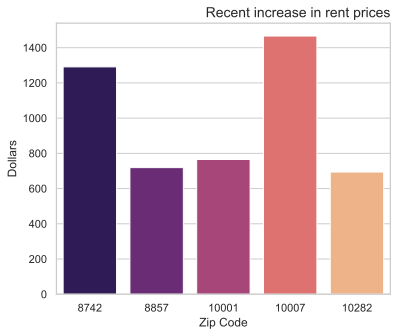

In [23]:
plt.figure(figsize=(6,5))
plt.title('Recent increase in rent prices',fontsize = 14,loc='right');
sns.set(style="whitegrid", color_codes=True);
ax = sns.barplot(data = zny[:5], y = zny.Increase[:5], x = zny.RegionName[:5], palette='magma')
ax.set(xlabel="Zip Code", ylabel = 'Dollars')
plt.show();